In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from math import exp,sqrt,fabs

# def grad_f(point):
    # x = point[0]
    # y = point[1]
    # return ( np.array(-2*exp(-x**2 - 6*x - y**2 - 6*y - 18)*((x - 3)*exp(12*(x + y)) + 4*(x - 1)*exp(8*(x + y + 2)) + (x + 3)*exp(12*y) + exp(12*x)*(x - 3) + x + 3), -2*exp(-x**2 - 6*x - y**2 - 6*y - 18)*((y - 3)*exp(12*(x + y)) + 4*(y - 1)*exp(8*(x + y + 2)) + exp(12*x)*(y + 3) + exp(12*y)*(y - 3) + y + 3)) )

# def cost_function(point):
        # return fabs(4 - f(point))

epsilon = 1e-5
max_iterations = 1e5
alpha = 0.1
num_iterations = 100

In [2]:
def f(point):
    x = point[0]
    y = point[1]
    return ( 4*exp(-(x**2 + y**2 -2*(x+y-1))) + exp(-((x-3)**2 + (y-3)**2)) + exp(-((x+3)**2 + (y-3)**2)) + exp(-((x-3)**2 + (y+3)**2)) + exp(-((x+3)**2 + (y+3)**2)) )

def get_successors(point,alpha):
    x = point[0]
    y = point[1]
    successors = []
    successors.append(np.array([x + alpha,y]))
    successors.append(np.array([x - alpha,y]))
    successors.append(np.array([x,y + alpha]))
    successors.append(np.array([x,y - alpha]))
    successors.append(np.array([x + alpha/sqrt(2),y + alpha/sqrt(2)]))
    successors.append(np.array([x - alpha/sqrt(2),y + alpha/sqrt(2)]))
    successors.append(np.array([x + alpha/sqrt(2),y - alpha/sqrt(2)]))
    successors.append(np.array([x - alpha/sqrt(2),y - alpha/sqrt(2)]))
    return successors

def get_max_successor(point,alpha):
    successors = get_successors(point,alpha)
    max = -1
    index = -1
    for i, successor in enumerate(successors):
        if f(successor) > max:
            max = f(successor)
            index = i
    return successors[index]

In [3]:
#  Gradient Descent
# current = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
# current = np.array([0,1])
# iterations = 0
# history = [current]
# local_max = []

# while not ((cost_function(current) < epsilon) or (iterations > max_iterations)):
#         current = current + alpha * grad_f(current)
#         history.append(current)
#         iterations = iterations + 1
# print(f"(x,y) = {current}\nvalue = {f(current)}")

In [4]:
# Hill Climbing
history = []
local_max = []

for _ in range(num_iterations):
    iterations = 0
    current = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
    successor = get_max_successor(current,alpha)
    history.append(current)
    while (f(successor) > f(current)) and (iterations < max_iterations):
        current = successor
        successor = get_max_successor(current,alpha)
        iterations+=1
        history.append(current)
    local_max.append(current)

print(f"(x,y) = {current}\nvalue = {f(current)}")

(x,y) = [1.03821079 1.00921888]
value = 3.9942294856452922


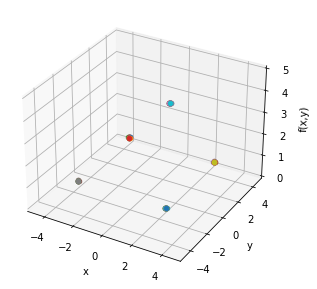

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
for element in local_max:
    ax.scatter3D(element[0],element[1],f(element))
plt.show()
fig.savefig("maximos.eps")

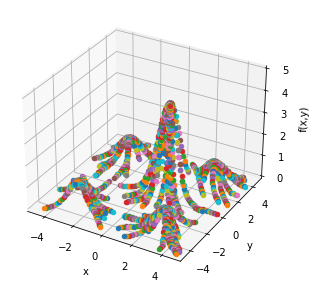

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [12]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
for element in history:
    ax.scatter3D(element[0],element[1],f(element))
plt.show()
fig.savefig("historico.eps")

In [14]:
for current in local_max:
    print(f"(x,y) = {current}\nvalue = {f(current)}")

(x,y) = [0.97298381 1.00461981]
value = 3.997302750537982
(x,y) = [ 3.03521853 -3.01993264]
value = 0.9983636916900556
(x,y) = [ 3.04594711 -2.99510895]
value = 0.9978672255357223
(x,y) = [1.04242865 1.02097848]
value = 3.9914802264109897
(x,y) = [-3.00151027  2.9674216 ]
value = 0.9989369414617864
(x,y) = [ 3.03418312 -2.98662022]
value = 0.9986534112497605
(x,y) = [1.01023488 0.96351001]
value = 3.994560625559076
(x,y) = [2.98177314 3.04099579]
value = 0.999211728450199
(x,y) = [0.99088532 1.02635327]
value = 3.997250054610528
(x,y) = [ 3.04485363 -2.98472865]
value = 0.9977574641862875
(x,y) = [-2.97912342  2.97693297]
value = 0.9990325592262669
(x,y) = [-3.00200714  2.9899223 ]
value = 0.9998944253816519
(x,y) = [3.01992828 2.98774796]
value = 1.000753464258197
(x,y) = [-2.98015487  2.95365015]
value = 0.9974611020319939
(x,y) = [3.02399803 2.97878689]
value = 1.0003002499059859
(x,y) = [-2.98916038 -3.0251592 ]
value = 0.999249798934113
(x,y) = [2.97689616 2.9973958 ]
value = 1.00